<a href="https://colab.research.google.com/github/Jaeek27/Data-Science-Projects/blob/main/RF_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions


In [ ]:
df=pd.read_csv("/content/Logan_housing.csv")

In [ ]:
df.head(10)

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0
5,299900,130,2,0,No,NW,Cache,Conventional,6,3,2765,1926,84335,2018,9,0
6,424000,463,6,0,No,NW,Cache,Conventional,4,4,5000,1933,84335,2019,12,0
7,775000,37,2,0,No,SE,Cache,Conventional,5,4,5180,1999,84328,2020,8,0
8,611000,38,2,0,No,SE,Cache,VA,5,3,4308,2015,84328,2020,11,1
9,1131310,115,2,0,Yes,SE,Cache,Cash,4,2,2116,1985,84328,2020,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [ ]:
df.isnull().sum()/len(df)

Sold Price           0.0
DOM                  0.0
Garage Capacity      0.0
HOA Fee              0.0
Irregular Shape      0.0
Quadrant             0.0
School District      0.0
Sold Terms           0.0
Total Bedrooms       0.0
Total Bathrooms      0.0
Total Square Feet    0.0
Year Built           0.0
Zip                  0.0
year_sold            0.0
month_sold           0.0
built_after_2000     0.0
dtype: float64

In [ ]:
sum(df.duplicated())

2

In [ ]:
# dropping the duplicates:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4108 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sold Price         4108 non-null   int64  
 1   DOM                4108 non-null   int64  
 2   Garage Capacity    4108 non-null   int64  
 3   HOA Fee            4108 non-null   int64  
 4   Irregular Shape    4108 non-null   float64
 5   Quadrant           4108 non-null   float64
 6   School District    4108 non-null   float64
 7   Sold Terms         4108 non-null   float64
 8   Total Bedrooms     4108 non-null   int64  
 9   Total Bathrooms    4108 non-null   int64  
 10  Total Square Feet  4108 non-null   int64  
 11  Year Built         4108 non-null   int64  
 12  Zip                4108 non-null   float64
 13  year_sold          4108 non-null   int64  
 14  month_sold         4108 non-null   int64  
 15  built_after_2000   4108 non-null   int64  
dtypes: float64(5), int64(11)

In [ ]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

Encode ordinal categorical features as an integer array.

In random forest we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handel ordinal data. We should transform ordinal categorical variables into quantitative variables

In [ ]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [ ]:
ordinal_categorical = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Zip']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

In [ ]:
df[ordinal_categorical]= enc.fit_transform(df[ordinal_categorical])

In [ ]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,0.0,1.0,0.0,2.0,3,1,1031,1974,12.0,2018,9,0
1,225000,6,2,0,0.0,1.0,0.0,1.0,4,2,2091,1995,12.0,2018,7,0
2,274900,14,2,0,0.0,1.0,0.0,1.0,3,1,2016,1980,12.0,2018,11,0
3,175000,16,1,0,0.0,1.0,0.0,4.0,4,1,1920,1978,12.0,2018,6,0
4,179000,29,0,0,0.0,1.0,0.0,0.0,4,2,1329,1976,12.0,2018,9,0


In [ ]:
enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['NE', 'NW', 'SE', 'SW'], dtype=object),
 array(['Cache', 'Logan'], dtype=object),
 array(['Cash', 'Conventional', 'FHA', 'Other', 'USDA Rural Development',
        'VA'], dtype=object),
 array([84305, 84308, 84318, 84319, 84320, 84321, 84325, 84326, 84327,
        84328, 84332, 84333, 84335, 84338, 84339, 84341])]

In [ ]:
df.shape

(4108, 16)

In [ ]:
rand_state = 1000

In [ ]:
y = df['Sold Price']
X = df.drop('Sold Price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [ ]:
# Predicting the Test set results
y_hat = RF_regression.predict(X_test)

In [ ]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4086,234500,260053.50
2938,200685,209089.60
175,345500,383279.00
1940,230000,229329.94
1763,299000,379321.73


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


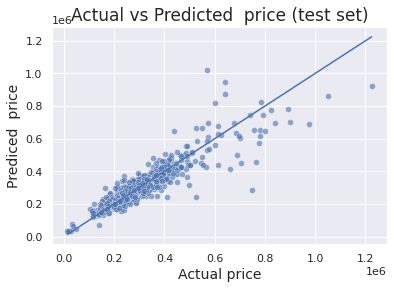

In [ ]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs Predicted  price (test set)', fontsize=17)
plt.show()

In [ ]:
np.round(RF_regression.score(X_test, y_test),4)

0.8364

In [ ]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

46624.02

In [ ]:
# Tuning Hyper Parameters 
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )


In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [ ]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}

In [ ]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [ ]:
y_hat_optimized = grid.predict(X_test)

In [ ]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
4086,234500,260053.50,265694.229000
2938,200685,209089.60,217248.538649
175,345500,383279.00,388735.819370
1940,230000,229329.94,219553.236865
1763,299000,379321.73,365663.077143


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


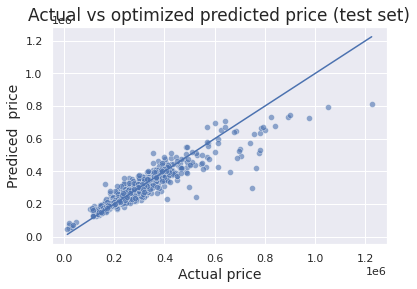

In [ ]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [ ]:
np.round(grid.score(X_test, y_test),4)

0.85

In [ ]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

44634.05

In [ ]:
# Using Cross Validation and OOB observations to estimate the R square in test set 
# Cross Validation 
from sklearn.model_selection import cross_val_score

In [ ]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [ ]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.7785

In [ ]:
# Out of Bag Errors 


We can show that on average, each bagged tree makes use of around 2/3 of the observations and 1/3 of them are not used to fit the model. These left out observations are called out-of-bag (OOB) observations. It turns out there is a very straightforward way to estimate the test errors using OOB observations. 

In [ ]:
np.random.choice(100,size=100)

array([80, 39, 96, 87, 49, 43, 35, 90, 39, 54, 64, 48, 98, 41, 23, 11, 97,
       61, 37, 86,  3, 10, 91, 46, 64, 34, 10,  3, 33, 28, 29, 61, 87,  7,
       61, 83, 70,  9,  8, 48, 58, 80,  7, 15, 48, 23, 71, 80, 62, 42, 53,
       77, 13, 41, 10, 10, 77, 99, 40, 90, 98, 99, 37, 32, 74,  4, 22, 36,
       40, 69, 63,  9, 39, 56, 96, 99, 20, 86, 93, 71, 60, 43, 26, 91, 16,
       75,  9, 54, 50, 25, 16, 37, 20, 67, 19, 17, 95, 69, 26, 79])

In [ ]:
np.unique(np.random.choice (100,size=100)).size

69

In [ ]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      oob_score=True)

In [ ]:
RF_oob.oob_score_

0.7730785721910307

In [ ]:
# Feature Importance 
features = list(X_train.columns)
features

['DOM',
 'Garage Capacity',
 'HOA Fee',
 'Irregular Shape',
 'Quadrant',
 'School District',
 'Sold Terms',
 'Total Bedrooms',
 'Total Bathrooms',
 'Total Square Feet',
 'Year Built',
 'Zip',
 'year_sold',
 'month_sold',
 'built_after_2000']

In [ ]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [ ]:
importance = RF_Regressor.feature_importances_
importance

array([0.04127894, 0.15613663, 0.04068394, 0.01246634, 0.02065348,
       0.01704769, 0.02687371, 0.09031669, 0.11711074, 0.32623255,
       0.05570161, 0.02771138, 0.02734889, 0.02667515, 0.01376227])

In [ ]:
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
3,Irregular Shape,0.012466
14,built_after_2000,0.013762
5,School District,0.017048
4,Quadrant,0.020653
13,month_sold,0.026675
6,Sold Terms,0.026874
12,year_sold,0.027349
11,Zip,0.027711
2,HOA Fee,0.040684
0,DOM,0.041279


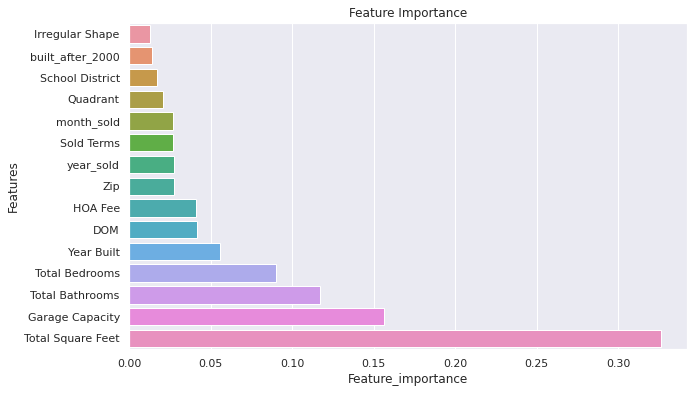

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()